In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keino import Params, k_path, pprint, add_colourbar
from ristikko import System, Space, models, Site

# Graphene

This is the simplest model of graphene, with no spin, no Zeeman field, and no spin-orbit coupling

## Plot lattice

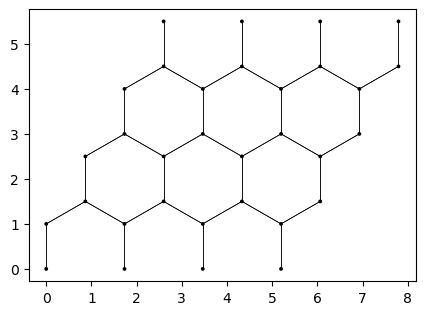

In [7]:
# Parameters for the system
params = dict(
    N1 = 4,         # number of unit cells in a1 direction
    N2 = 4,         # number of unit cells in a2 direction
    mu = 0,         # chemical potential
    t = 1,          # hopping energy
    pbc = False,    # open boundary conditions
)
params = Params(params)

# The second argument could also be a lattice object
# if you want more control, e.g.
# lattice = models.Graphene()
realspace = System(Space.RealSpace, "graphene", params)

realspace.plot()

## Plot the spectra

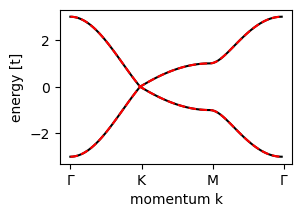

In [3]:
params = dict(
    mu = 0,
    t = 1,
)

params = Params(params)

sys = System(Space.KSpace, "graphene", params)

points = np.array([
    [0, 0],
    [4*np.pi/3, 0],
    [np.pi, np.pi/np.sqrt(3)],
    [0, 0],
])
nk = 101
Ks = np.array(k_path(nk, points))

Ek = np.array(sys.diagonalise(k=Ks, cache=True, refresh_cache=True))
analytic = np.array([np.sqrt(1 + 4 * np.cos(Ks[:, 0]/2)**2 + 4 * np.cos(Ks[:, 0]/2) * np.cos(np.sqrt(3)/2 * Ks[:, 1])), -np.sqrt(1 + 4 * np.cos(Ks[:, 0]/2)**2 + 4 * np.cos(Ks[:, 0]/2) * np.cos(np.sqrt(3)/2 * Ks[:, 1]))])

fig, axis = plt.subplots(figsize=(3, 2))
axis.plot(Ek/params.t, color="black")
axis.plot(analytic.T, "--", color="red")
axis.set_xlabel("momentum k")
axis.set_ylabel("energy [t]")
ticks = np.linspace(0, nk, 4)
labels = [r"$\Gamma$", "K", "M", r"$\Gamma$"]
axis.set_xticks(ticks, labels)

## LDOS

In [4]:
params = dict(
    N1 = 16,
    N2 = 16,
    mu = 0,
    t = 1,
    pbc = False,
)
params = Params(params)

sys = System(Space.RealSpace, "graphene", params)

omega = np.linspace(-4, 4, 1001)
ldos = sys.calc_ldos(omega=omega, delta=0.05)

params.pbc = True
sys = System(Space.RealSpace, "graphene", params)
ldos_pbc = sys.calc_ldos(omega=omega, delta=0.05)

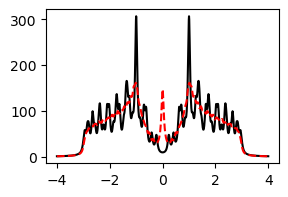

In [5]:
dos = ldos.sum(axis=(0, 1, 2, 3, 4))
dos_pbc = ldos_pbc.sum(axis=(0, 1, 2, 3, 4))

fig, axis = plt.subplots(figsize=(3, 2))
axis.plot(omega, dos_pbc, color="black")
axis.plot(omega, dos, "--", color="red")

### Plot the E=0 state

[]

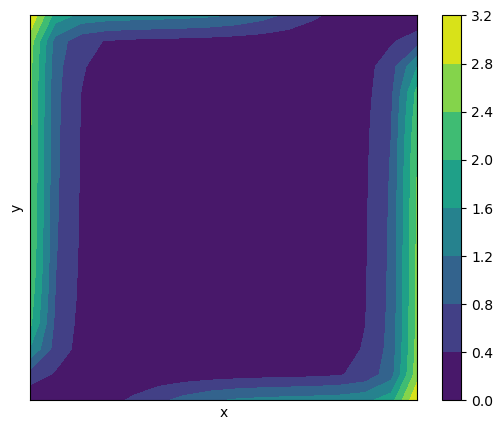

In [6]:
zero_energy_ldos = ldos[:, :, :, :, :, 500].sum(axis=(2, 3, 4))

fig, axis = plt.subplots(figsize=(5, 5))
im = axis.contourf(zero_energy_ldos)

add_colourbar(fig, axis, im)

axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_xticks([])
axis.set_yticks([])

### Remove stray sites at top and bottom

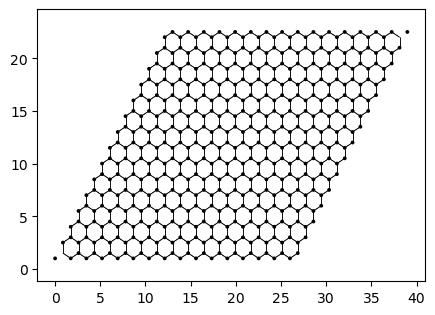

In [19]:
params = dict(
    N1 = 16,
    N2 = 16,
    mu = 0,
    t = 1,
    pbc = False,
)
params = Params(params)

lattice = models.Graphene()

sites = [Site(x, 15, 0, 1) for x in range(16)] + [Site(x, 0, 0, 0) for x in range(16)] + [Site(0, 0, 0, 1)] + [Site(15, 15, 0, 0)]
for site in sites:
    lattice.remove_site(site)

sys = System(Space.RealSpace, lattice, params)

sys.plot()

In [20]:
omega = np.linspace(-4, 4, 1001)
ldos = sys.calc_ldos(omega=omega, delta=0.05)

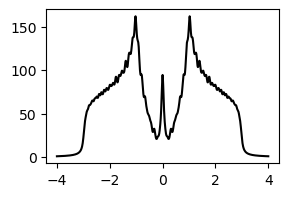

In [21]:
dos = ldos.sum(axis=(0, 1, 2, 3, 4))

fig, axis = plt.subplots(figsize=(3, 2))
axis.plot(omega, dos, color="black")

[]

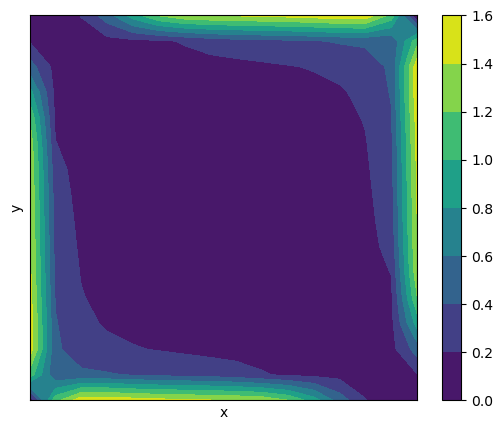

In [24]:
import scipy.interpolate as interpolate
zero_energy_ldos = ldos[:, :, :, :, :, 500].sum(axis=(2, 3, 4))

fig, axis = plt.subplots(figsize=(5, 5))
im = axis.contourf(zero_energy_ldos)

add_colourbar(fig, axis, im)

axis.set_xlabel("x")
axis.set_ylabel("y")
axis.set_xticks([])
axis.set_yticks([])